#IMPORTING THE LIBRARY

In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# READ THE DATA SET

In [3]:
sms=pd.read_csv('spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#DR0P THE NULL VALUE COLOMN AND RENAM ETHE COLOMN AS OER OUR REQUERMENT

#this code to change the data type ham as 0 and spam as 1

In [4]:
sms=pd.read_csv('spam.csv',encoding='latin-1')
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
sms=sms.rename(columns={'v1':'label', 'v2':'text'})
sms.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms['label'].replace(['ham', 'spam'], [0, 1], inplace=True)

#EXPLORE THE DATA

In [6]:
print('no of rows',len(sms))

no of rows 5572


In [7]:
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [8]:
sms.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# the code calculates and adds a new column 'length' to the sms DataFrame, which contains the length of each text entry in the original 'text' column. The head() function is then used to display the first few rows of the DataFrame for inspection.

In [9]:
sms['length'] = sms['text'].apply(len)
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#This code snippet uses the matplotlib and seaborn libraries in Python to create a histogram of the lengths of the text entries in the 'length' column of the sms DataFrame

<Axes: ylabel='Frequency'>

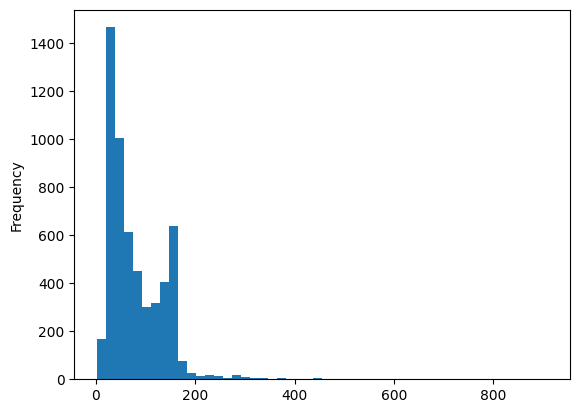

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sms['length'].plot(bins=50, kind='hist')


#This code snippet uses the hist method in Pandas to create separate histograms of the 'length' column in the sms DataFrame based on the values in the 'label' column

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

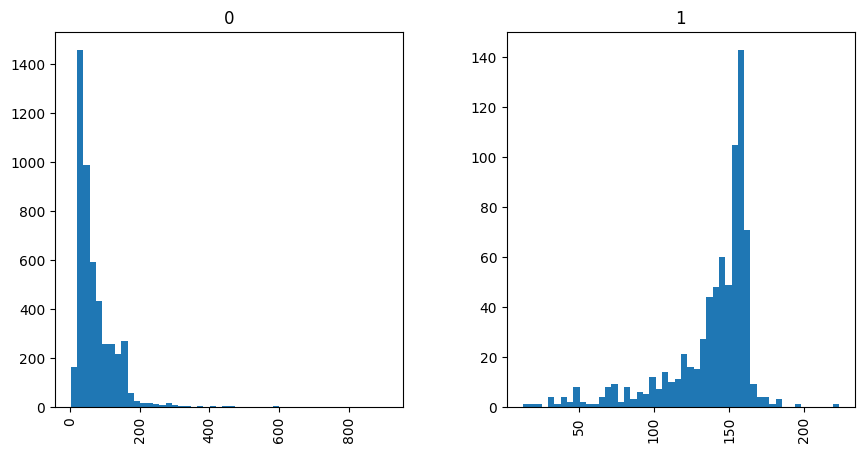

In [11]:
sms.hist(column ='length',by = 'label',bins= 50,figsize=(10,5))

In [12]:
!pip install text-unidecode

#this code prepares text data for machine learning by using CountVectorizer to convert text into a numerical format and then splitting the data into training and testing sets for model training and evaluation

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count = CountVectorizer()
input=['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat']
text=count.fit_transform(sms['text'],input)
x_train,x_test,y_train,y_test=train_test_split(text, sms['label'],test_size=0.2,random_state=1)

#These print statements are useful for understanding the dimensions of your feature matrices, which is crucial information when working with machine learning models.








In [14]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8625)
(1115, 8625)


In [15]:
x_train

<4457x8625 sparse matrix of type '<class 'numpy.int64'>'
	with 59209 stored elements in Compressed Sparse Row format>

#This code snippet involves using the scikit-learn library to create and train a Multinomial Naive Bayes classifier

In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

#This code snippet uses the trained Multinomial Naive Bayes model (model) to make predictions on the testing data (x_test). The predictions are then printed to the console

In [17]:
predection = model.predict(x_test)
print(predection)

[0 0 0 ... 0 0 0]


#Each print statement outputs the corresponding metric value to the console. These metrics give you a more detailed understanding of the model's performance beyond just accuracy, taking into account factors like false positives and false negatives

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy_score: {}'.format(accuracy_score(y_test, predection)))
print('precision_score: {}'.format(precision_score(y_test, predection)))
print('recall_score: {}'.format(recall_score(y_test, predection)))
print('f1_score: {}'.format(f1_score(y_test, predection)))

accuracy_score: 0.97847533632287
precision_score: 0.891156462585034
recall_score: 0.9424460431654677
f1_score: 0.9160839160839161


In [19]:
from sklearn.naive_bayes import BernoulliNB

model =  BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy_score: {}'.format(accuracy_score(y_test, predection)))
print('precision_score: {}'.format(precision_score(y_test, predection)))
print('recall_score: {}'.format(recall_score(y_test, predection)))
print('f1_score: {}'.format(f1_score(y_test, predection)))

accuracy_score: 0.97847533632287
precision_score: 0.891156462585034
recall_score: 0.9424460431654677
f1_score: 0.9160839160839161


In [21]:
#USING SVM

from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
predection = model.predict(x_test)
print('accuracy_score: {}'.format(accuracy_score(y_test, predection)))
print('precision_score: {}'.format(precision_score(y_test, predection)))
print('recall_score: {}'.format(recall_score(y_test, predection)))
print('f1_score: {}'.format(f1_score(y_test, predection)))


accuracy_score: 0.9874439461883409
precision_score: 0.9921259842519685
recall_score: 0.9064748201438849
f1_score: 0.9473684210526315


In [22]:
input

<1x8625 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [23]:
data=sms['text']
input=['Go until jurong point, crazy.. Available only in bugis n great world la e buffet Cine there got amore wat']
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ?_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [24]:
data.loc[len(data.index)]="Go until jurong point, crazy.. Available only in bugis n great world la e buffet Cine there got amore wat"
data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                Will ?_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572    Go until jurong point, crazy.. Available only ...
Name: text, Length: 5573, dtype: object

In [25]:
text=count.fit_transform(data)
text

<5573x8625 sparse matrix of type '<class 'numpy.int64'>'
	with 73742 stored elements in Compressed Sparse Row format>

In [26]:
inptu=text[5572]

# this will the predect the type of the msg is spam or ham.if we get 0 then its an ham and if we get the out put as 1 then its an spam msg.

In [27]:
model.predict(inptu)


array([0])